In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!wget https://drive.google.com/u/0/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF&export=download

--2022-04-01 11:47:59--  https://drive.google.com/u/0/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.101, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF [following]
--2022-04-01 11:47:59--  https://drive.google.com/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7gbapijmbsud7aj2hptu8ikg3q296312/1648813650000/17903335045350097388/*/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF [following]
--2022-04-01 11:48:01--  https://doc-10-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7gbapijmbsud7aj2hptu8ikg3q296312/1648813650000/1

In [ ]:
data = pd.read_csv('/content/uc?id=1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF')
data.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,01 Mar 2017,mobile,2019-10-02


In [ ]:
data.shape

(203787, 15)

In [ ]:
data = data.head(8000)

In [ ]:
data.shape

(8000, 15)

In [ ]:
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          8000 non-null   int64  
 1   category        8000 non-null   object 
 2   name            8000 non-null   object 
 3   rating          8000 non-null   int64  
 4   originalRating  0 non-null      float64
 5   reviewTitle     2250 non-null   object 
 6   reviewContent   3955 non-null   object 
 7   likeCount       8000 non-null   int64  
 8   upVotes         8000 non-null   int64  
 9   downVotes       8000 non-null   int64  
 10  helpful         8000 non-null   bool   
 11  relevanceScore  8000 non-null   float64
 12  boughtDate      7310 non-null   object 
 13  clientType      8000 non-null   object 
 14  retrievedDate   8000 non-null   object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 882.9+ KB


In [ ]:
data.isnull().sum()

itemId               0
category             0
name                 0
rating               0
originalRating    8000
reviewTitle       5750
reviewContent     4045
likeCount            0
upVotes              0
downVotes            0
helpful              0
relevanceScore       0
boughtDate         690
clientType           0
retrievedDate        0
dtype: int64

In [ ]:
#Menghilangkan kolom originalrating dan reviewTitle karena terlalu banyak nilai NaN
data = data.drop(['originalRating', 'reviewTitle'], axis=1)

In [ ]:
data.shape

(8000, 13)

In [ ]:
#Menghapus nilai NaN pada data di kolom reviewContent
data.dropna(subset = ['reviewContent'], inplace=True)

In [ ]:
data.shape

(3955, 13)

In [ ]:
data.rating.value_counts()

5    2793
4     565
1     291
3     217
2      89
Name: rating, dtype: int64

In [ ]:
#Memberikan label pada berdasarkan kolom rating
print('Total Jumlah rating:', data.shape[0], 'data\n')
print('terdiri dari (rating):')
print('-- [1] Sangat Buruk\t:', data[data.rating == 1].shape[0], 'data')
print('-- [2] Buruk\t\t:', data[data.rating == 2].shape[0], 'data')
print('-- [3] Netral\t\t:', data[data.rating == 3].shape[0], 'data')
print('-- [4] Bagus\t\t:', data[data.rating == 4].shape[0], 'data')
print('-- [5] Sangat Bagus\t:', data[data.rating == 5].shape[0], 'data\n')

Total Jumlah rating: 3955 data

terdiri dari (rating):
-- [1] Sangat Buruk	: 291 data
-- [2] Buruk		: 89 data
-- [3] Netral		: 217 data
-- [4] Bagus		: 565 data
-- [5] Sangat Bagus	: 2793 data



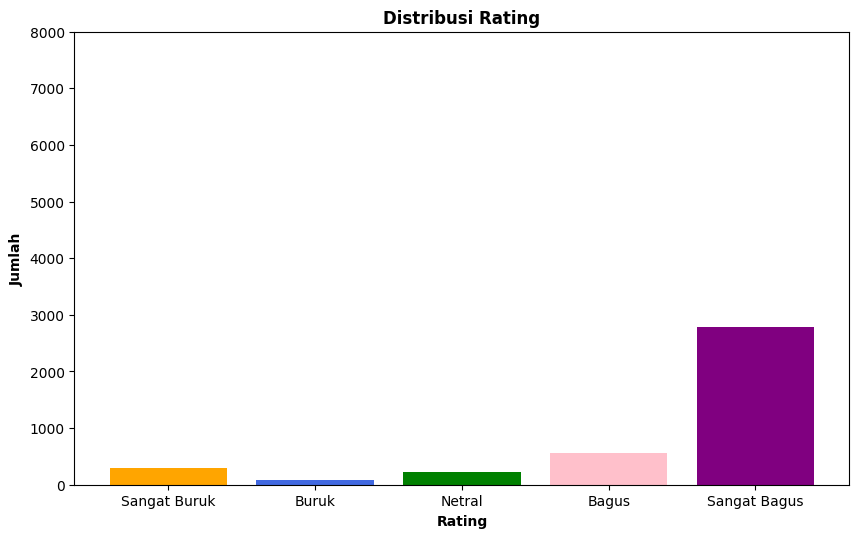

In [ ]:
height = data['rating'].value_counts().sort_index()
labels = ('Sangat Buruk', 'Buruk', 'Netral', 'Bagus', 'Sangat Bagus')
y_pos = np.arange(len(labels))

plt.figure(figsize=(10,6), dpi=100)
plt.ylim(0,8000)
plt.title('Distribusi Rating', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['orange', 'royalblue', 'green', 'pink', 'purple'])
plt.xticks(y_pos, labels)
plt.show()

## Text Pre-Processing

### Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['reviewContent'].iloc[100]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  VERY GOOD
Case folding	:  very good


### Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-01 11:48:03--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2022-04-01 11:48:04 (5.00 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### Filtering (Stop word removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

761

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tv', 'barang', 'dn']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['reviewContent'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  baru 10 bulan layarnya dah bergaris
Case folding		:  baru  bulan layarnya dah bergaris
Stopword removal	:  layarnya dah bergaris


### Stemming

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 3.8 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['reviewContent'].iloc[1245]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Pegiriman cepat dan paket dibungkus dengan rapih.
Case folding		:  pegiriman cepat dan paket dibungkus dengan rapih
Stopword removal	:  pegiriman cepat paket dibungkus rapih
Stemming		:  pegiriman cepat paket bungkus rapih


### Text Pre-processing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['After pre-processing'] = data['reviewContent'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 9min 3s, sys: 1.99 s, total: 9min 5s
Wall time: 9min 8s


In [ ]:
data[['reviewContent', 'After pre-processing']]

,reviewContent,After pre-processing
0,bagus mantap dah sesui pesanan,bagus mantap sesui pesan
1,"Bagus, sesuai foto",bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood
3,bagus sesuai,bagus sesuai
7,bima,bima
...,...,...
7995,"Produk Bagus, sesuai dgn warna, dapet bonus Po...",produk bagus sesuai warna dapet bonus pouch bo...
7996,"Respon cepat pengiriman cepat, barang bagusss",respon cepat kirim cepat bagusss
7997,"Terima Kasih Kualitas barang OK, pengiriman cepat",terima kasih kualitas ok kirim cepat
7998,Keren sesuai ekspektasi,keren sesuai ekspektasi


In [ ]:
# Simpan data yang telah melalui text preprocessing
data.to_csv('fix_data.csv')

## Feature Engineering

In [ ]:
# Pisahkan kolom feature dan target
X = data['After pre-processing']
y = data['rating']

In [ ]:
X

0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
7                                                    bima
                              ...                        
7995    produk bagus sesuai warna dapet bonus pouch bo...
7996                     respon cepat kirim cepat bagusss
7997                 terima kasih kualitas ok kirim cepat
7998                              keren sesuai ekspektasi
7999                               bagus sesuai deskripsi
Name: After pre-processing, Length: 3955, dtype: object

In [ ]:
y

0       5
1       4
2       5
3       4
7       1
       ..
7995    4
7996    5
7997    5
7998    5
7999    4
Name: rating, Length: 3955, dtype: int64

### Feature Extraction : Bag Of Words

In [ ]:
#Mengubah teks menjadi matriks
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(1,2))
vec.fit(X)

CountVectorizer(ngram_range=(1, 2))

In [ ]:
# Melihat Jumlah Fitur
print(len(vec.get_feature_names_out()))

17786


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['abal' 'abal abal' 'abal lagibaguslahmksh' ... 'zippernya kecewa' 'zone'
 'zuma']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,abal,abal abal,abal lagibaguslahmksh,abal lazada,abal nih,abang,abang gojek,abang kurir,abizzzx,accessories,...,yya dgambar,zada,zeb,zeb pesan,zenfone,zenfone bahan,zippernya,zippernya kecewa,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)

### Feature Extraction (TF-IDF & N-Gram)

Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

17786


In [ ]:
print(tf_idf.get_feature_names_out())

['abal' 'abal abal' 'abal lagibaguslahmksh' ... 'zippernya kecewa' 'zone'
 'zuma']


In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abal,abal abal,abal lagibaguslahmksh,abal lazada,abal nih,abang,abang gojek,abang kurir,abizzzx,accessories,...,yya dgambar,zada,zeb,zeb pesan,zenfone,zenfone bahan,zippernya,zippernya kecewa,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Save data menggunakan pickle dump
with open('tf_idf.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=1000) #memilih 1000 fitur terbaik
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 17786
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['score'])
data_chi2

,score
0,2.208025
1,0.103531
2,0.103531
3,4.503362
4,7.929293
...,...
17781,0.109188
17782,6.601836
17783,6.601836
17784,1.638092


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,score,fitur
0,2.208025,abal
1,0.103531,abal abal
2,0.103531,abal lagibaguslahmksh
3,4.503362,abal lazada
4,7.929293,abal nih
...,...,...
17781,0.109188,zenfone bahan
17782,6.601836,zippernya
17783,6.601836,zippernya kecewa
17784,1.638092,zone


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='score', ascending=False)

,score
17633,43.438202
3525,43.438202
6414,38.056338
13975,32.627745
7198,32.099219
...,...
8050,0.034618
9851,0.034618
7861,0.034618
7860,0.034618


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False = fitur tidak terpilih
# True = fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ...,  True, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
len(selected_feature)

1000

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal nih,activationnyacode,activationnyacode nyaa,aju,aju kembali,aktivasi tech,alat,alat transfer,alhamdulillah amin,ambil ekspedisi,...,ya mending,ya sesuaitq,yaaa ujung,yacc,yahik,yahik hik,ygcabang,ygcabang beli,zippernya,zippernya kecewa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('best_feature.pickle', 'wb') as output:
  pickle.dump(X_kbest_features, output)

## Word Cloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
!wget https://re-thought.com/content/images/2020/12/1599661.jpg

--2022-04-01 12:38:16--  https://re-thought.com/content/images/2020/12/1599661.jpg
Resolving re-thought.com (re-thought.com)... 172.67.141.86, 104.21.87.44, 2606:4700:3030::ac43:8d56, ...
Connecting to re-thought.com (re-thought.com)|172.67.141.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16469 (16K) [image/jpeg]
Saving to: ‘1599661.jpg’

1599661.jpg         100%[===================>]  16.08K  --.-KB/s    in 0s      

2022-04-01 12:38:17 (62.5 MB/s) - ‘1599661.jpg’ saved [16469/16469]



In [ ]:
originalImage = cv2.imread('flower.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

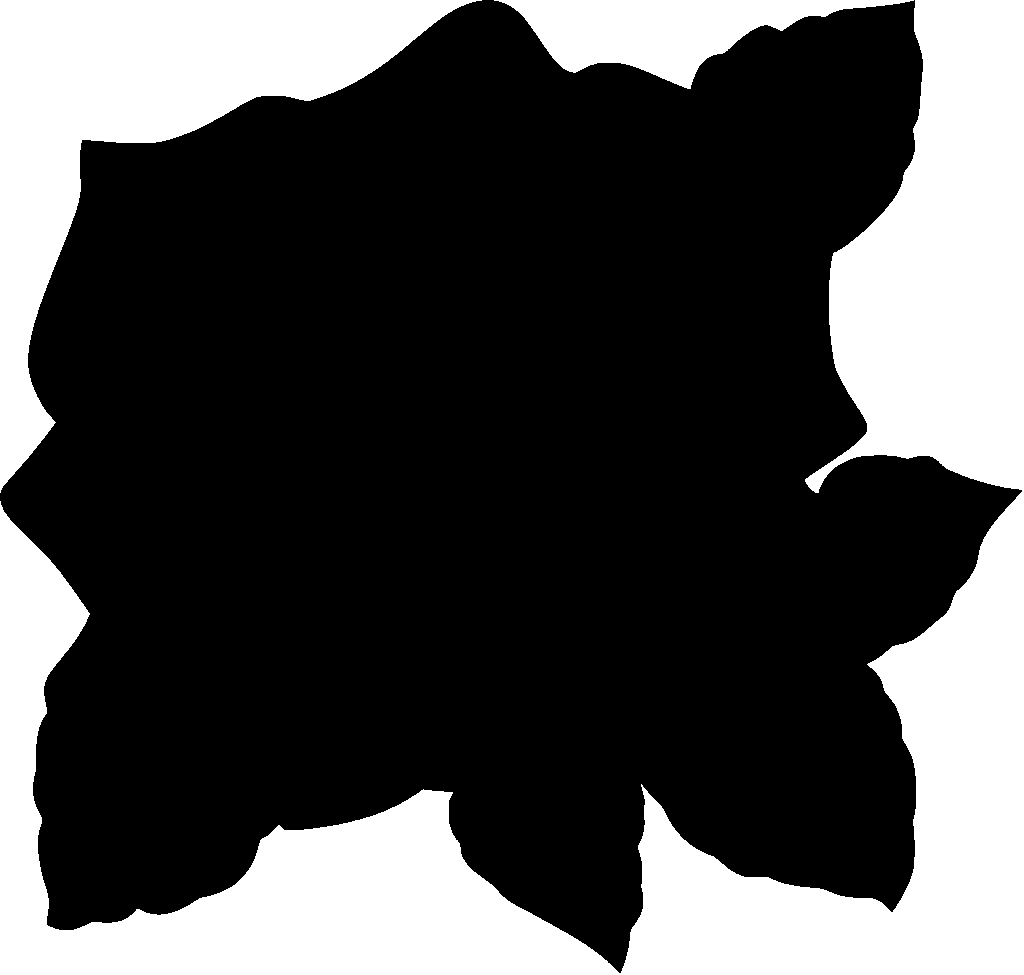

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

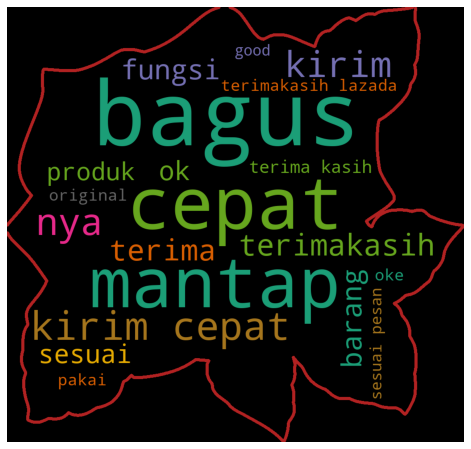

In [ ]:
# WordCloud Label sangat bagus (rating == 5)

sangat_bagus = data[data.rating == 5]
sgt_bagus_string = []

for t in sangat_bagus['After pre-processing']:
  sgt_bagus_string.append(t)

sgt_bagus_string = pd.Series(sgt_bagus_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='black', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(sgt_bagus_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## KESIMPULAN

Pada proses pengerjaan data diatas, terdapat langkah-langkah yang saya perlu lakukan. Langkah pertama ialah, memastikan tidak adanya data kosong. Apabila terdapat data yang kosong, maka perlu dilakukan pembersihan terlebih dahulu.

Setelah data bersih, selanjutnya dilakukan pre-processing. Pada tahap ini, ada 4 jenis pre-processing yang dilakukan, yaitu :
1. Case Folding, case folding ini dilakukan untuk mengubah teks menjadi lower case, menghapus url, menghapus angka dan menghapus karakter tanda baca yang sifatnya tidak diperlukan pada data.
2. Word Normalization
3. Filtering, melakukan penghapusan stop word.
4. Stemming, untuk mendapatkan kata dasar dari teks yang terdapat dalam data.

Langkah selanjutnya ialah feature engineering. Pada tahap ini dilakukan pemisahan kolom fitur dan target. Pada kasus, X menggunakan data setelah dilakukan pre-processing dan y menggunakan data rating. Lalu, di tahap feature extraction, dilakukan dua jenis yaitu BoW dengan melakukan perhitungan frekuensi kata pada data, dan TF-IDF melakukan penilaian dari suatu informasi pada data. **Pada BoW dan TF-IDF, saya telah melakukan percobaan beberapa nilai n_gram. Dari percobaan tersebut, saya dapat menyimpulkan bahwa nilai n_gram mempengaruhi dalam proses klasifikasi fitur dan jumlah fitur yang dihasilkan. Pada range n_gram sendiri, 1 mewakilkan unigram, 2 mewakilkan bigram, dan 3 mewakilkan trigram.**

Langkah terakhir ialah feature selection untuk menentukan fitur dengan skor tertinggi. nilai K menentukan berapa banyak fitur terbaik yang akan ditampilkan. Pada tahap ini, terdapat X_kbest_features yang menurut saya sudah relevan dengan data.